# Problem Statement

**An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.** 

 

**The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.**

 

**Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.**

## Step 1: Importing and Understanding Data

In [1]:
# ignoring the unwanted warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing necessary libraies- 
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [3]:
# Setting maximum display of columns in the output
pd.set_option("display.max_columns", None)

In [4]:
# importing the dataset-
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# EDA

**Univariate Analysis-**

There are Some columns which contains values as "Select", These values are not Selected by the person. So let's fill "Didn't Select" instead of "Select".

**Let's Start with Categorical Variables**

In [5]:
# finding columns that contains Select values-  
def find_select_columns(df):
    cols = [col for col in df.columns if df[col].eq("Select").any()]
    return cols

find_select_columns(df)

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [6]:
# let's map the "Select" as "Didn't Select"-
df["Specialization"] = df["Specialization"].apply(lambda x: "Didn't Select" if x == "Select" else x)
df["How did you hear about X Education"] = df["How did you hear about X Education"].apply(lambda x: "Didn't Select" if x == "Select" else x)
df["Lead Profile"] = df["Lead Profile"].apply(lambda x: "Didn't Select" if x == "Select" else x)
df["City"] = df["City"].apply(lambda x: "Didn't Select" if x == "Select" else x)

In [7]:
df['Converted'].value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

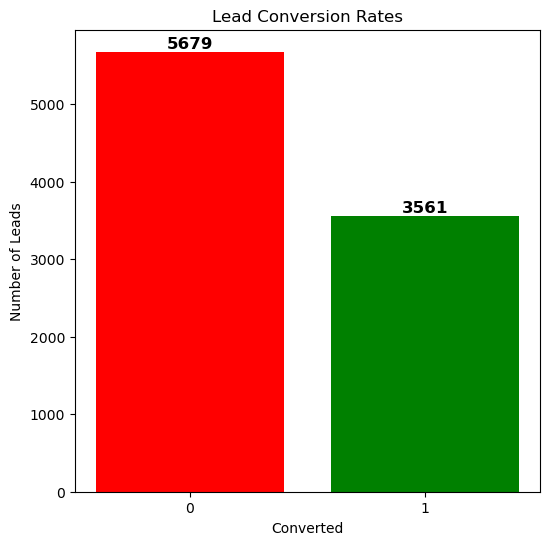

In [8]:
# Create the bar chart
fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figsize for better visualization
counts = df['Converted'].value_counts()  # Get value counts

# Create the bar chart with colors based on conversion status
ax.bar(counts.index, counts.values, color=['red', 'green'])

# Add labels and title
ax.set_xlabel("Converted")
ax.set_ylabel("Number of Leads")
ax.set_title("Lead Conversion Rates")
plt.xticks([0,1], ["0", "1"])

# Add percentages above bars
for bar, value in zip(ax.patches, counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{value:.0f}", ha='center', va='bottom', fontsize=12, fontweight='bold')

# Show the plot
plt.show()

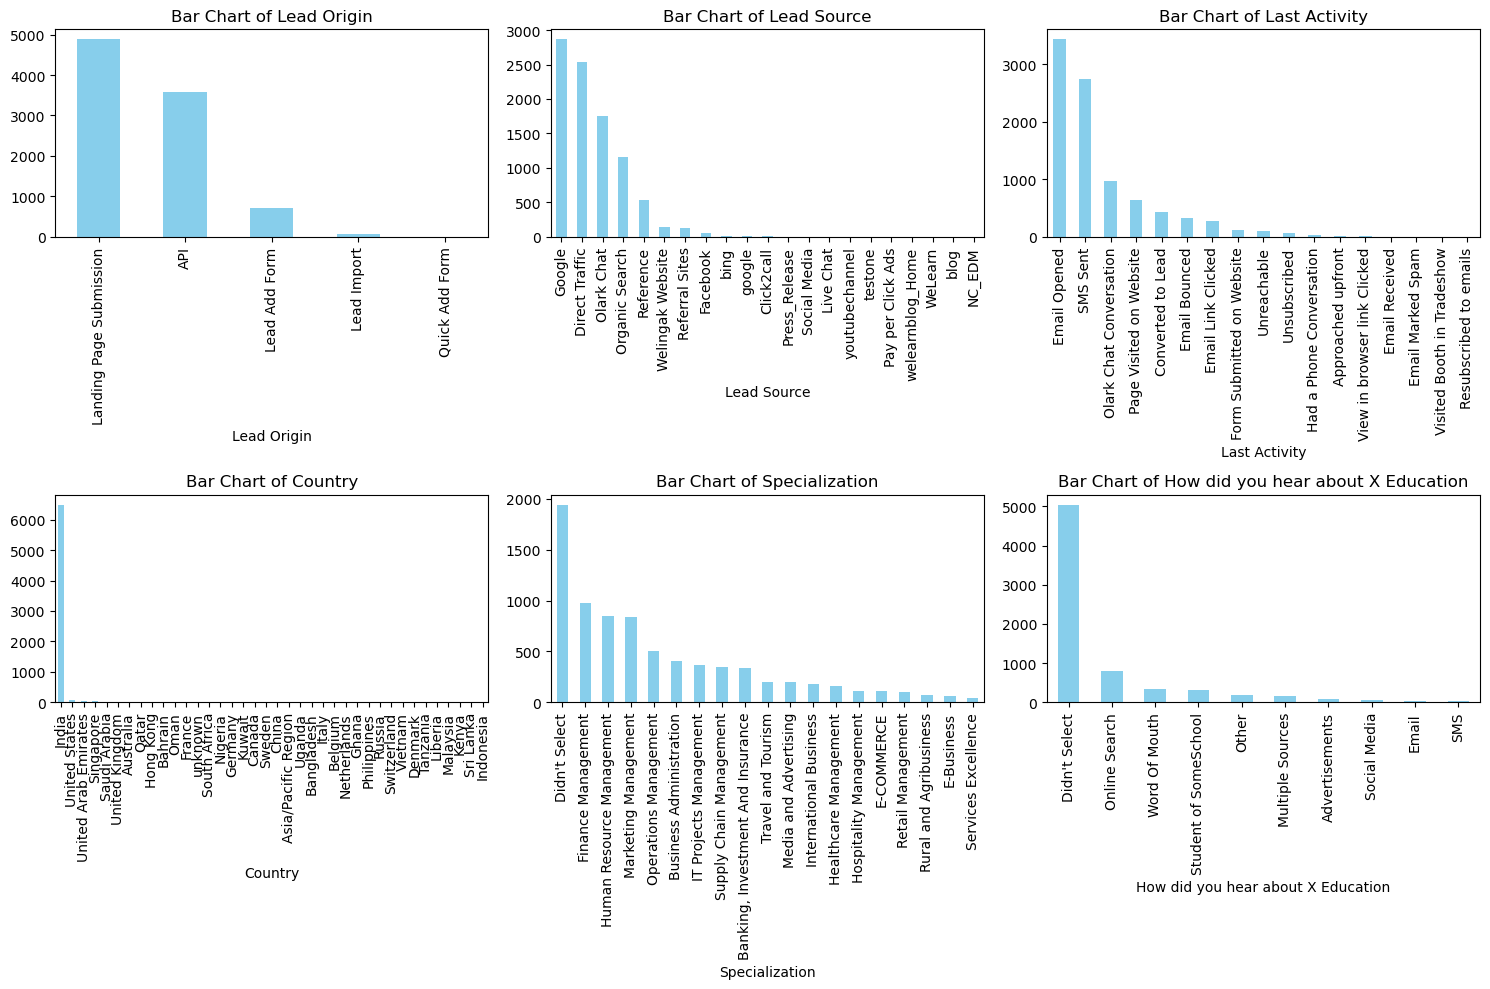

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Create a figure with 2 rows and 3 columns

# Plot the bar chart in the first subplot
df["Lead Origin"].value_counts().plot.bar(ax=axes[0][0], color=["skyblue"])
axes[0][0].set_title("Bar Chart of Lead Origin")  # Add a title
axes[0][0].set_xlabel("Lead Origin")
# Plot the bar chart in the second subplot
df["Lead Source"].value_counts().plot.bar(ax=axes[0][1], color=["skyblue"])
axes[0][1].set_title("Bar Chart of Lead Source")  # Add a title
axes[0][1].set_xlabel("Lead Source")
# Plot the bar chart in the Third subplot
df["Last Activity"].value_counts().plot.bar(ax=axes[0][2], color=["skyblue"])
axes[0][2].set_title("Bar Chart of Last Activity")  # Add a title
axes[0][2].set_xlabel("Last Activity")
# Plot the bar chart in the Fourth subplot
df["Country"].value_counts().plot.bar(ax=axes[1][0], color=["skyblue"])
axes[1][0].set_title("Bar Chart of Country")  # Add a title
axes[1][0].set_xlabel("Country")
# Plot the bar chart in the Fifth subplot
df["Specialization"].value_counts().plot.bar(ax=axes[1][1], color=["skyblue"])
axes[1][1].set_title("Bar Chart of Specialization")  # Add a title
axes[1][1].set_xlabel("Specialization")
# Plot the bar chart in the Sixth subplot
df["How did you hear about X Education"].value_counts().plot.bar(ax=axes[1][2], color=["skyblue"])
axes[1][2].set_title("Bar Chart of How did you hear about X Education")  # Add a title
axes[1][2].set_xlabel("How did you hear about X Education")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the combined plot

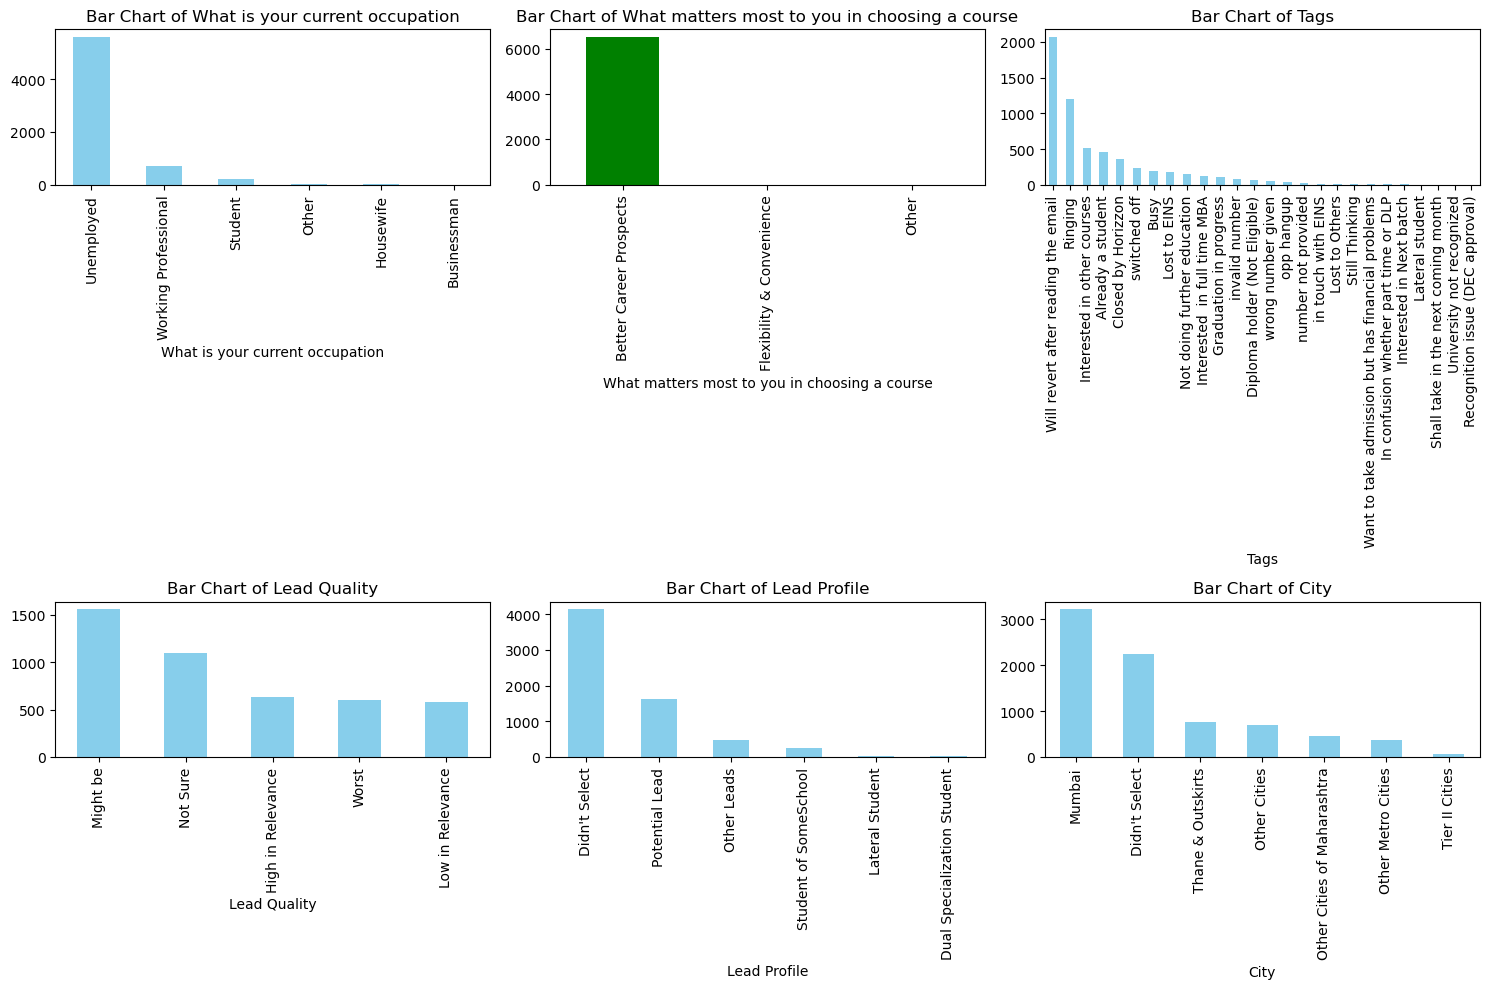

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Create a figure with 2 rows and 3 columns

# Plot the bar chart in the first subplot
df["What is your current occupation"].value_counts().plot.bar(ax=axes[0][0], color=["skyblue"])
axes[0][0].set_title("Bar Chart of What is your current occupation")  # Add a title
axes[0][0].set_xlabel("What is your current occupation")
# Plot the bar chart in the second subplot
df["What matters most to you in choosing a course"].value_counts().plot.bar(ax=axes[0][1], color=["Green"])
axes[0][1].set_title("Bar Chart of What matters most to you in choosing a course")  # Add a title
axes[0][1].set_xlabel("What matters most to you in choosing a course")
# Plot the bar chart in the Third subplot
df["Tags"].value_counts().plot.bar(ax=axes[0][2], color=["skyblue"])
axes[0][2].set_title("Bar Chart of Tags")  # Add a title
axes[0][2].set_xlabel("Tags")
# Plot the bar chart in the Fourth subplot
df["Lead Quality"].value_counts().plot.bar(ax=axes[1][0], color=["skyblue"])
axes[1][0].set_title("Bar Chart of Lead Quality")  # Add a title
axes[1][0].set_xlabel("Lead Quality")
# Plot the bar chart in the Fifth subplot
df["Lead Profile"].value_counts().plot.bar(ax=axes[1][1], color=["skyblue"])
axes[1][1].set_title("Bar Chart of Lead Profile")  # Add a title
axes[1][1].set_xlabel("Lead Profile")
# Plot the bar chart in the Sixth subplot
df["City"].value_counts().plot.bar(ax=axes[1][2], color=["skyblue"])
axes[1][2].set_title("Bar Chart of City")  # Add a title
axes[1][2].set_xlabel("City")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the combined plot

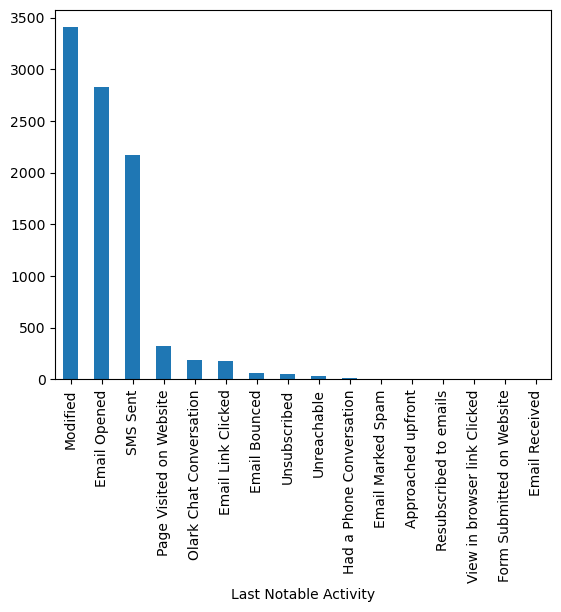

In [11]:
df["Last Notable Activity"].value_counts().plot.bar()
plt.show()

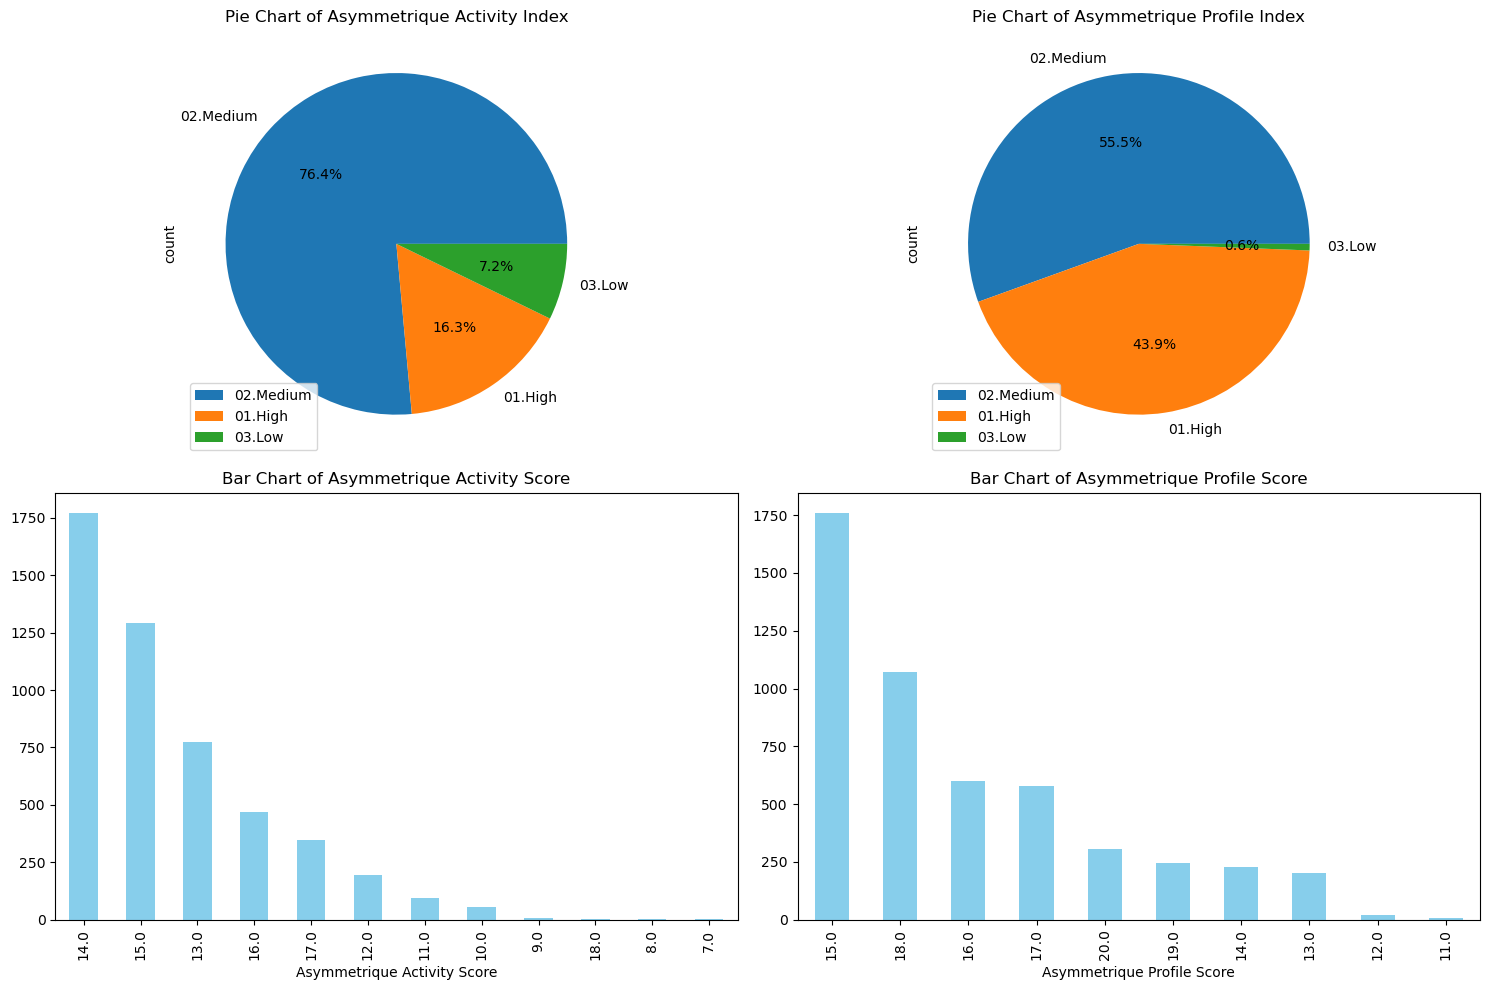

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Create a figure with 2 rows and 2 columns

# Plot the pie chart in the first subplot
df["Asymmetrique Activity Index"].value_counts().plot.pie(ax=axes[0][0], autopct='%1.1f%%')
axes[0][0].set_title("Pie Chart of Asymmetrique Activity Index")  # Add a title
axes[0][0].legend(loc= 'lower left')
# Plot the pie chart in the second subplot
df["Asymmetrique Profile Index"].value_counts().plot.pie(ax=axes[0][1], autopct='%1.1f%%')
axes[0][1].set_title("Pie Chart of Asymmetrique Profile Index")  # Add a title
axes[0][1].legend(loc= 'lower left')
# Plot the bar chart in the Third subplot
df["Asymmetrique Activity Score"].value_counts().plot.bar(ax=axes[1][0], color=["skyblue"])
axes[1][0].set_title("Bar Chart of Asymmetrique Activity Score")  # Add a title
axes[1][0].set_xlabel("Asymmetrique Activity Score")
# Plot the bar chart in the Fourth subplot
df["Asymmetrique Profile Score"].value_counts().plot.bar(ax=axes[1][1], color=["skyblue"])
axes[1][1].set_title("Bar Chart of Asymmetrique Profile Score")  # Add a title
axes[1][1].set_xlabel("Asymmetrique Profile Score")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the combined plot

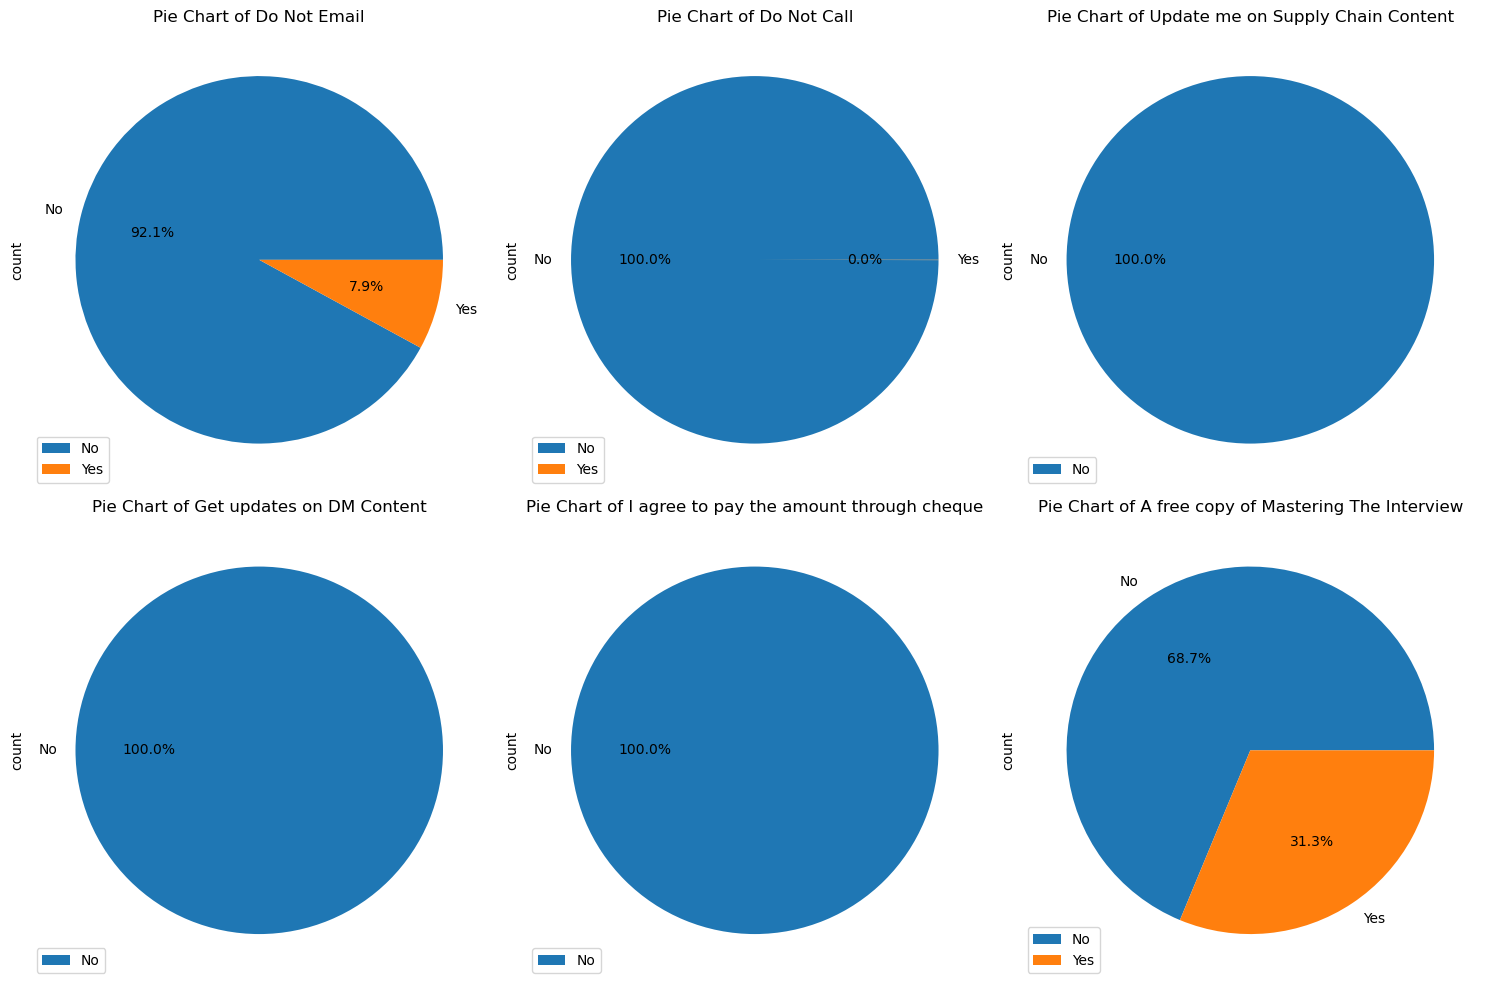

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Create a figure with 2 rows and 3 columns

# Plot the pie chart in the first subplot
df["Do Not Email"].value_counts().plot.pie(ax=axes[0][0], autopct='%1.1f%%')
axes[0][0].set_title("Pie Chart of Do Not Email")  # Add a title
axes[0][0].legend(loc= 'lower left')
# Plot the pie chart in the second subplot
df["Do Not Call"].value_counts().plot.pie(ax=axes[0][1], autopct='%1.1f%%')
axes[0][1].set_title("Pie Chart of Do Not Call")  # Add a title
axes[0][1].legend(loc= 'lower left')
# Plot the pie chart in the Third subplot
df["Update me on Supply Chain Content"].value_counts().plot.pie(ax=axes[0][2], autopct='%1.1f%%')
axes[0][2].set_title("Pie Chart of Update me on Supply Chain Content")  # Add a title
axes[0][2].legend(loc= 'lower left')
# Plot the pie chart in the Fourth subplot
df["Get updates on DM Content"].value_counts().plot.pie(ax=axes[1][0], autopct='%1.1f%%')
axes[1][0].set_title("Pie Chart of Get updates on DM Content")  # Add a title
axes[1][0].legend(loc= 'lower left')
# Plot the pie chart in the Fifth subplot
df["I agree to pay the amount through cheque"].value_counts().plot.pie(ax=axes[1][1], autopct='%1.1f%%')
axes[1][1].set_title("Pie Chart of I agree to pay the amount through cheque")  # Add a title
axes[1][1].legend(loc= 'lower left')
# Plot the pie chart in the Sixth subplot
df["A free copy of Mastering The Interview"].value_counts().plot.pie(ax=axes[1][2], autopct='%1.1f%%')
axes[1][2].set_title("Pie Chart of A free copy of Mastering The Interview")  # Add a title
axes[1][2].legend(loc= 'lower left')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the combined plot

where did you see an ad about X Education


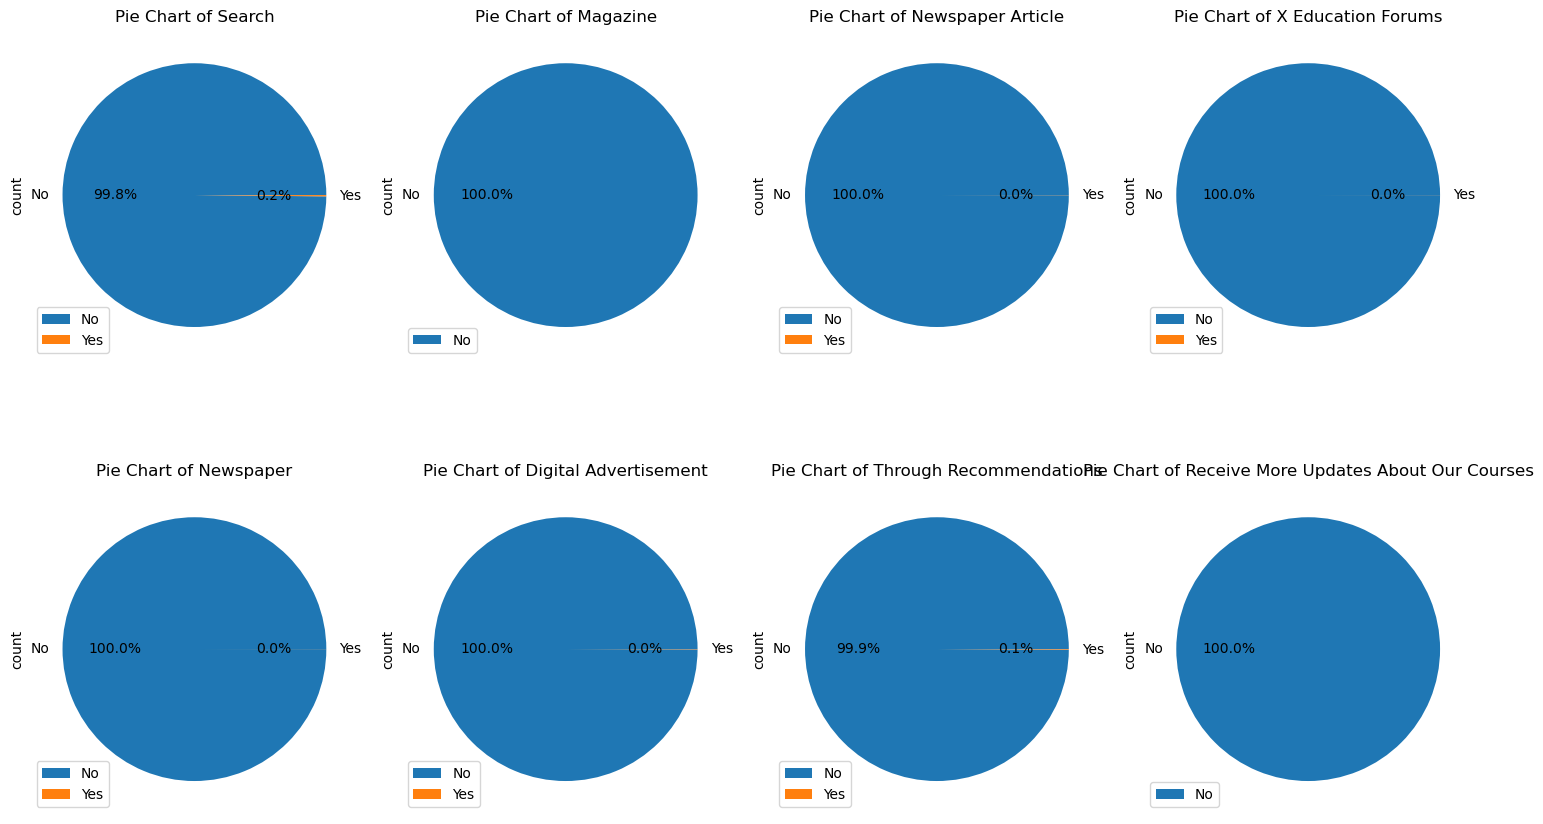

In [14]:
print("where did you see an ad about X Education")
fig, axes = plt.subplots(2, 4, figsize=(15, 10))  # Create a figure with 2 rows and 4 columns

# Plot the pie chart in the first subplot
df["Search"].value_counts().plot.pie(ax=axes[0][0], autopct='%1.1f%%')
axes[0][0].set_title("Pie Chart of Search")  # Add a title
axes[0][0].legend(loc= 'lower left')
# Plot the pie chart in the second subplot
df["Magazine"].value_counts().plot.pie(ax=axes[0][1], autopct='%1.1f%%')
axes[0][1].set_title("Pie Chart of Magazine")  # Add a title
axes[0][1].legend(loc= 'lower left')
# Plot the pie chart in the Third subplot
df["Newspaper Article"].value_counts().plot.pie(ax=axes[0][2], autopct='%1.1f%%')
axes[0][2].set_title("Pie Chart of Newspaper Article")  # Add a title
axes[0][2].legend(loc= 'lower left')
# Plot the pie chart in the Fourth subplot
df["X Education Forums"].value_counts().plot.pie(ax=axes[0][3], autopct='%1.1f%%')
axes[0][3].set_title("Pie Chart of X Education Forums")  # Add a title
axes[0][3].legend(loc= 'lower left')
# Plot the pie chart in the Fifth subplot
df["Newspaper"].value_counts().plot.pie(ax=axes[1][0], autopct='%1.1f%%')
axes[1][0].set_title("Pie Chart of Newspaper")  # Add a title
axes[1][0].legend(loc= 'lower left')
# Plot the pie chart in the Sixth subplot
df["Digital Advertisement"].value_counts().plot.pie(ax=axes[1][1], autopct='%1.1f%%')
axes[1][1].set_title("Pie Chart of Digital Advertisement")  # Add a title
axes[1][1].legend(loc= 'lower left')
# Plot the pie chart in the Seventh subplot
df["Through Recommendations"].value_counts().plot.pie(ax=axes[1][2], autopct='%1.1f%%')
axes[1][2].set_title("Pie Chart of Through Recommendations")  # Add a title
axes[1][2].legend(loc= 'lower left')
# Plot the pie chart in the Eighth subplot
df["Receive More Updates About Our Courses"].value_counts().plot.pie(ax=axes[1][3], autopct='%1.1f%%')
axes[1][3].set_title("Pie Chart of Receive More Updates About Our Courses")  # Add a title
axes[1][3].legend(loc= 'lower left')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the combined plot

## Bivariate and Multivariate Analyses

**Now, Let's check numerical variables.**

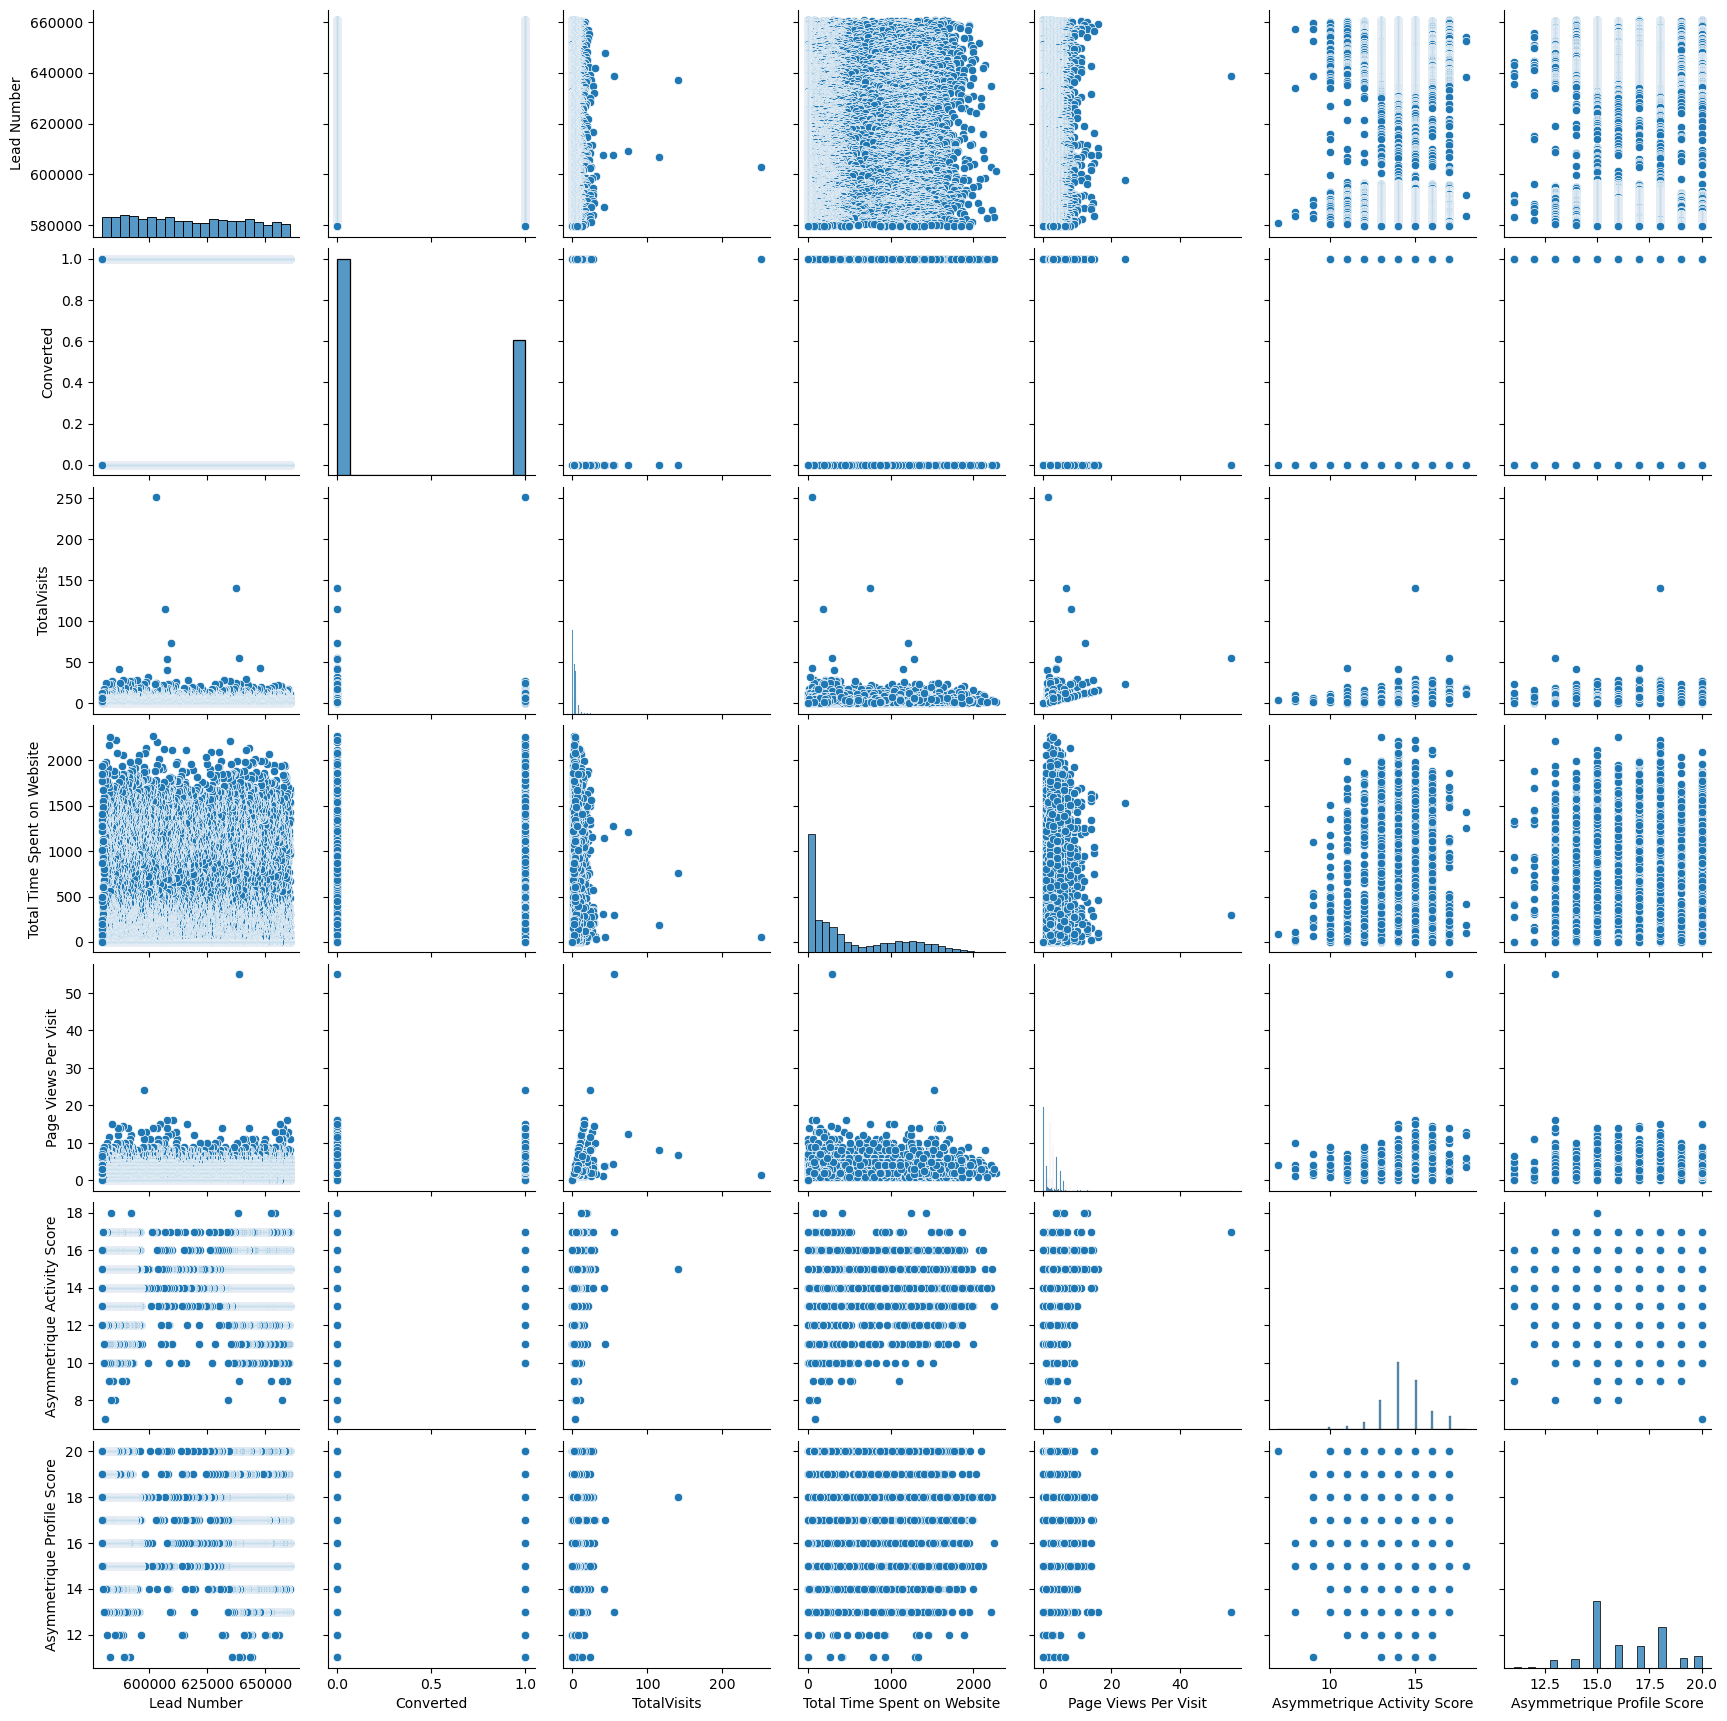

In [15]:
sns.pairplot(df)
plt.show()

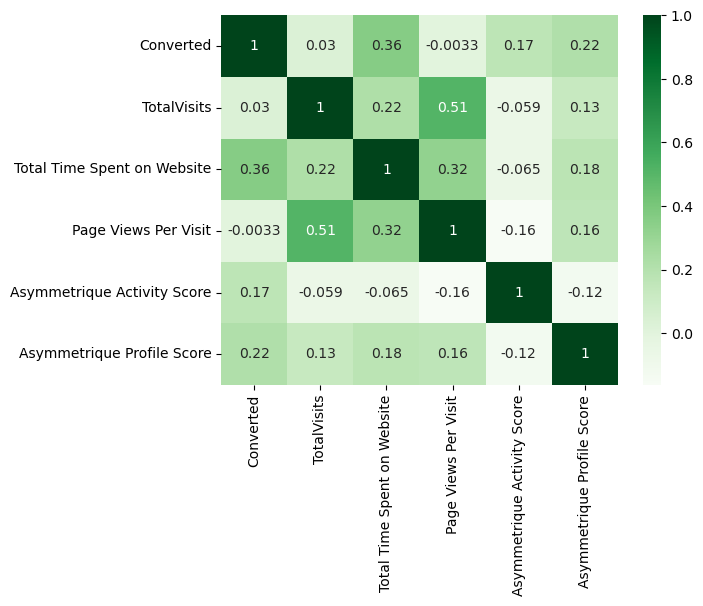

In [16]:
# creating heatmap for numerical variables-
sns.heatmap(df[["Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit", "Asymmetrique Activity Score", "Asymmetrique Profile Score"]].corr(),annot=True,cmap="Greens")
plt.show()

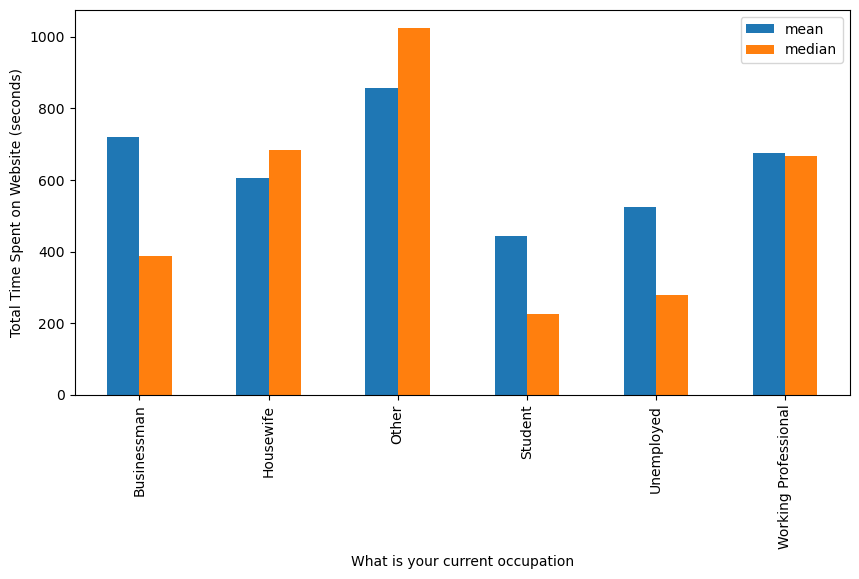

In [17]:
# the bar graph of Total time spent and current Occupation mean and median
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby("What is your current occupation")["Total Time Spent on Website"].aggregate(["mean","median"]).plot.bar(ax =ax)
ax.set_ylabel("Total Time Spent on Website (seconds)")
plt.show()

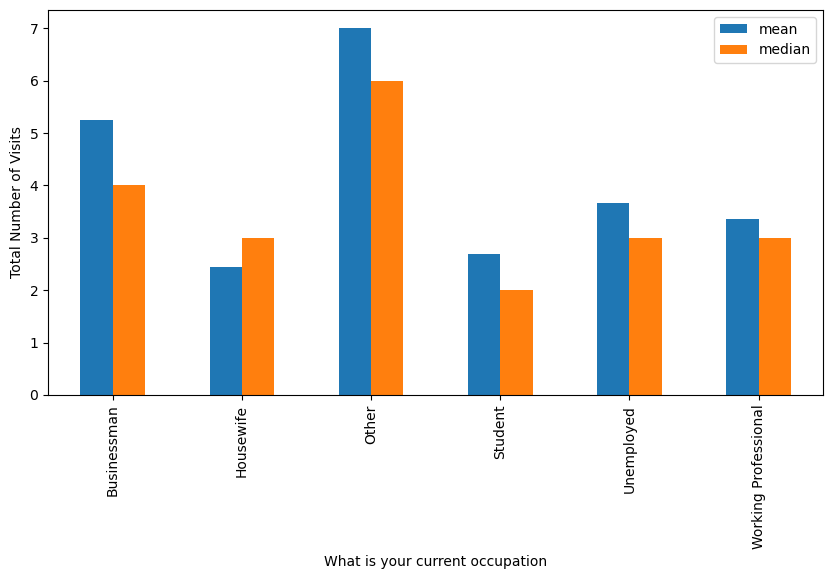

In [18]:
# the bar graph of Total visits and current Occupation mean and median
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby("What is your current occupation")["TotalVisits"].aggregate(["mean","median"]).plot.bar(ax =ax)
ax.set_ylabel("Total Number of Visits")
plt.show()

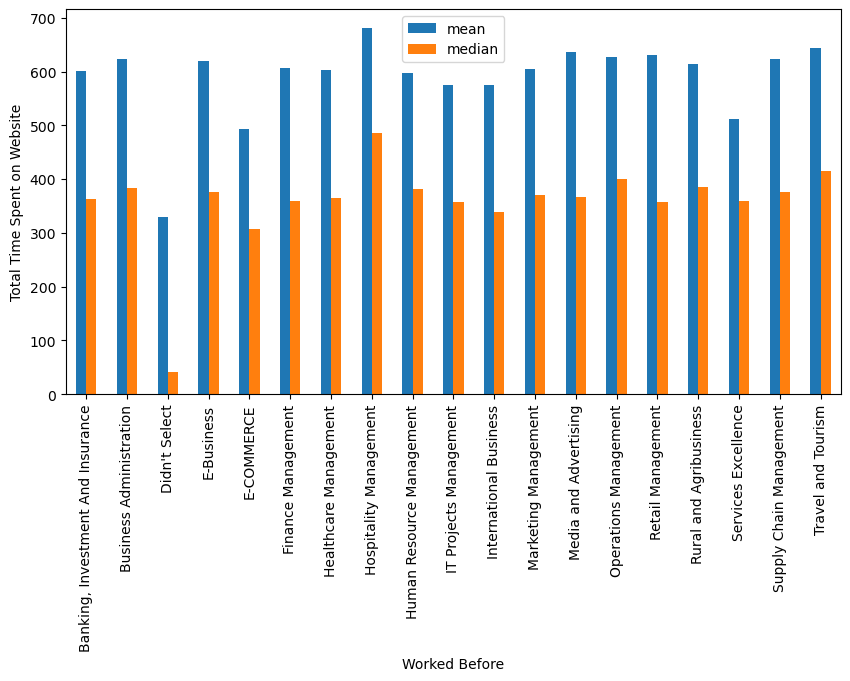

In [19]:
# the bar graph of Total time spent on website and The domain they worked before mean and median
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby("Specialization")["Total Time Spent on Website"].aggregate(["mean","median"]).plot.bar(ax =ax)
ax.set_xlabel("Worked Before")
ax.set_ylabel("Total Time Spent on Website")
plt.show()

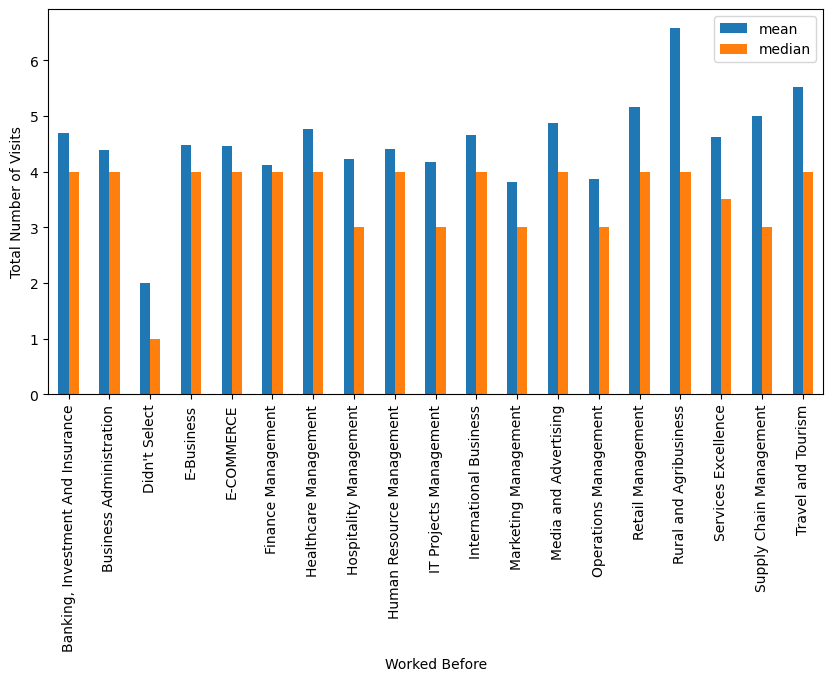

In [20]:
# the bar graph of Total Visits and The domain they worked before mean and median
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby("Specialization")["TotalVisits"].aggregate(["mean","median"]).plot.bar(ax =ax)
ax.set_xlabel("Worked Before")
ax.set_ylabel("Total Number of Visits")
plt.show()

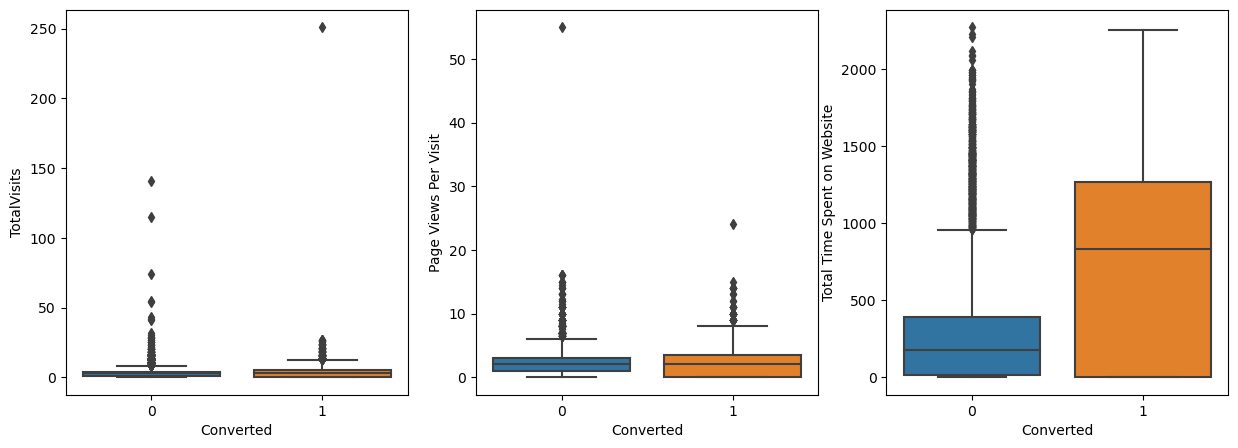

In [21]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()

Next, we will move to further steps.

In [22]:
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [23]:
# checking shape
leads.shape

(9240, 37)

In [24]:
# checking summary
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [25]:
# checking info
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 2: Data Preparation

In [26]:
# checking number of null values-
leads.isnull().sum().sort_values(ascending = False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

We can see above that there are some attributes which have almost half of values as missing. Before moving forward to delete those columns. Let's also check the percentage of missing values.

In [27]:
# checking percentage of null in each column-
null_percentage = leads.isnull().sum()*100/leads.shape[0]
null_percentage.sort_values(ascending = False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

### I will delete the columns which has null values more than 30%

In [28]:
# dropping the redundent variables-
for var in leads.columns:
    if leads[var].isnull().sum()*100/leads.shape[0] > 30:
        leads.drop(var, axis = 1, inplace = True)

In [29]:
# checking percentage of null in each column again-
null_percentage1 = leads.isnull().sum()*100/leads.shape[0]
null_percentage1.sort_values(ascending = False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

In the above output, there are two columns, City and Country, just because X Education company sells online course, These two columns are not useful and they have too much missing values, So it is better to drop them.

In [30]:
# dropping City and country columns-
leads.drop(["City", "Country"], axis = 1, inplace = True)

In the data, I was told beforehand that there are some columns have "Select" as values, which are equal to not known and missing.

In [31]:
# checking value counts of all attributes-
for var in leads.columns:
    print(leads[var].value_counts())
    print("_"*50)

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
__________________________________________________
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64
__________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
__

After checking the value counts, One can observe that there are variables has "Select" i.e missing values. and others variables which are not so significant because they have some values majorly present and covers the entire columns more than 90%. Let's impute "Select" as "unknown".

In [32]:
# finding columns that contains Select values-  
def find_select_columns(df):
    cols = [col for col in df.columns if df[col].eq("Select").any()]
    return cols

find_select_columns(leads)

['Specialization', 'How did you hear about X Education', 'Lead Profile']

In [33]:
# let's map the "Select" as Unknown-
leads["Specialization"] = leads["Specialization"].apply(lambda x: "Unknown" if x == "Select" else x)
leads["How did you hear about X Education"] = leads["How did you hear about X Education"].apply(lambda x: "Unknown" if x == "Select" else x)
leads["Lead Profile"] = leads["Lead Profile"].apply(lambda x: "Unknown" if x == "Select" else x)

In [34]:
print(leads["Specialization"].value_counts())
print("_"*50)
print(leads["How did you hear about X Education"].value_counts())
print("_"*50)
print(leads["Lead Profile"].value_counts())

Specialization
Unknown                              1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64
__________________________________________________
How did you hear about X Education
Unknown                  5043
Online Search             808
Word Of Mouth  

In [35]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

Next we will delete the columns which are not significant because they contains some values majorly present.

In [36]:
# finding insignificant columns that has value of majority more than 90%
def find_majority_columns(df):
    cols = []
    for col in df.columns:
        value_counts = df[col].value_counts(normalize = True)
        if value_counts.iloc[0]> 0.9:
            cols.append(col)
    return cols


insignificant = find_majority_columns(leads.copy())  # Avoid modifying the original DataFrame
print(insignificant)

['Do Not Email', 'Do Not Call', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


We will drop the columns in the above output-

In [37]:
# dropping redundent variables-
leads.drop(insignificant, axis = 1, inplace = True)
leads.isnull().sum().sort_values(ascending = False)

Lead Profile                              2709
What is your current occupation           2690
How did you hear about X Education        2207
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Checking the value counts of all columns which has number values

In [38]:
for col in leads.columns:
    if leads[col].isnull().sum() > 1:
        print(leads[col].value_counts())
        print("_"*50)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
__________________________________________________
TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.

Since, `Lead Profile` and `How did you hear about X Education` has majority of unknown values, we will drop these columns because dropping these many missing value rows will drastically reduce the total rows in dataframe.

In [39]:
# dropping redundent variables-
leads.drop(["Lead Profile", "How did you hear about X Education"], axis = 1, inplace = True)
leads.isnull().sum().sort_values(ascending = False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In the above output, `What is your current occupation` is a important variable but it has too many null values. We will drop the null rows only.

In [40]:
# dropping null row in What is your current occupation column-
leads = leads.dropna(subset=["What is your current occupation"], inplace=False)
leads.isnull().sum().sort_values(ascending = False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

Since, in the above output, one can observe that there are not many missing values, we will delete the null rows of above missing value columns.

In [41]:
# dropping redundent rows-
leads = leads.dropna(subset=["TotalVisits"], inplace=False)
leads = leads.dropna(subset=["Page Views Per Visit"], inplace=False)
leads = leads.dropna(subset=["Last Activity"], inplace=False)
leads = leads.dropna(subset=["Lead Source"], inplace=False)
leads = leads.dropna(subset=["Specialization"], inplace=False)
leads.isnull().sum().sort_values(ascending = False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

There are no more missing value left in the dataframe, We will check the shape-

In [42]:
leads.shape

(6373, 13)

In [43]:
# checking how much percentage of rows we are left with-
leads.shape[0] * 100 / 9240        # 9240 is the number of rows we had in the starting

68.97186147186147

We have almost 69% of rows we retained.

In [44]:
# checking dataframe
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,No,Modified


`Prospect ID` and `Lead Number` is not helpful while creating logistic Regression model, So we will delete them too.

In [45]:
# dropping redundent variable-
leads.drop(["Prospect ID", "Lead Number"], axis = 1, inplace = True)
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,No,Modified


There is a column `A free copy of Mastering The Interview`, in this we map Yes as 1 and No as 0.

In [46]:
leads["A free copy of Mastering The Interview"] = leads["A free copy of Mastering The Interview"].map({"Yes":1, "No":0})
leads["A free copy of Mastering The Interview"].value_counts()

A free copy of Mastering The Interview
0    4202
1    2171
Name: count, dtype: int64

In [47]:
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,0,Modified


Next, we will create dummy variables-

In [48]:
# creating variable that contains all object columns names-
obj_cols  = list(leads.select_dtypes(include='object').columns)

In [49]:
# creating dummies dataframe-
dummies = pd.get_dummies(leads[obj_cols], drop_first = True)
dummies = dummies.astype(int)
dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [50]:
# Dropping objects columns from leads dataframe and concatinating dummies-
leads.drop(obj_cols, axis = 1, inplace = True)
leads = pd.concat([leads, dummies], axis = 1)
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## Step 3: Checking correlation matrix

In [51]:
# let's check the correlation matrix
leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.005651,0.313338,-0.063362,-0.094833,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,0.018407,-0.044348,-0.034223,-0.012059,-0.012059,0.243200,-0.023501,0.000676,0.013015,0.144864,-0.006411,-0.012059,-0.138834,-0.134838,-0.033557,0.018407,-0.022391,0.018407,-0.036322,0.041575,-0.164168,-0.087121,0.285854,-0.021383,-0.032757,-0.011583,-0.012059,0.014468,-0.017955,-0.015443,0.027078,0.028249,-0.006080,0.025865,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762,-0.093559,0.039068,0.011575,-0.034491,-0.259722,0.304859,-0.052371,-0.026291,0.018407,-0.010199,0.013015,0.046969,-0.239572,-0.039205,-0.032219,0.284301,0.050436,-0.026673,-0.012059
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.186583,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,-0.012720,-0.247963,0.192469,-0.001549,0.005896,-0.180458,0.078163,-0.003946,-0.004031,-0.097011,-0.004116,0.003414,-0.074517,-0.040748,-0.013791,0.001319,0.011982,0.006584,0.007614,0.020031,-0.076145,0.210159,-0.039886,0.013528,0.001193,0.022964,0.000933,0.035184,0.015248,0.019003,0.031922,0.027640,0.016549,0.032934,0.025182,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,0.015114,0.063383,0.064384,-0.208327,-0.008788,0.032481,-0.030920,0.024928,-0.016292,-0.009105,0.002706,0.001319,0.026851,0.005896,0.026100,-0.088690,-0.004994,0.226728,-0.028923,0.002792,0.001631,0.010859
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.154256,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,-0.016774,-0.320143,0.078956,-0.009090,-0.00

## Step 4: Train-Test Split

In [52]:
# importing train_test_split library
from sklearn.model_selection import train_test_split

In [53]:
# defining y-
y = leads.pop("Converted")
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [54]:
# defining X-
X = leads
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [55]:
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, test_size= 0.3, random_state= 100)

## Rescaling Features-

`TotalVisits`, `Total Time Spent on Website` and `Page Views Per Visit` are the feature which need to be rescaled.

In [56]:
# importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# instanciating an scaler object
scaler = MinMaxScaler()

In [57]:
# applying scaler-
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8003,0.015936,0.029489,0.125,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
218,0.015936,0.082306,0.250,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [58]:
print("X_train dimensions-",X_train.shape)
print("X_test dimensions-",X_test.shape)
print("y_train dimensions-",y_train.shape)
print("y_test dimensions-",y_test.shape)

X_train dimensions- (4461, 73)
X_test dimensions- (1912, 73)
y_train dimensions- (4461,)
y_test dimensions- (1912,)


In [59]:
# Checking the Lead Conversion Rate
conv_rate = (sum(df['Converted'])/len(df['Converted'].index))*100
conv_rate

38.53896103896104

Before building the model, we have a conversion rate of about 39%.

## Step 5: Model Building

In [60]:
# importing statsmodels library
import statsmodels.api as sm

In [61]:
# building logistic regression model
logR = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())

# fitting and checking parameters
logR.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4393
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 21 Jun 2024   Deviance:                   1.1992e+05
Time:                        17:35:31   Pearson chi2:                 5.86e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 -2.26e+15   8.85e+07  -2.55e+07      0.000   -2.26e+15   -2.26e+15
TotalVisits                                           4.972e+15    5.4e+07   9.21e+07      0.000    4.97e+15    4.97e+15
Total Time Spent on Website                           1.356e+15   4.66e+06   2.91e+08      0.000    1.36e+15    1.36e+15
Page Views Per Visit                                 -2.385e+14   1.15e+07  -2.06e+07      0.000   -2.38e+14   -2.38e+14
A free copy of Mastering The Interview                -2.29e+14   3.09e+06  -7.41e+07      0.000   -2.29e+14   -2.29e+14
Lead Origin_Landing Page Submission                   3.098e+14   3.81e+06   8.13e+07      0.000     3.1e+14     3.1e+14
Lead Origin_Lead Add Form                             5.348e+15   4.77e+07   1.12e+08      0.000    5.35e+15    5.35e+15
Lead Origin_Lead Import                               3.893e+15   4.21e+07   9.25e+07      0.000    3.89e+15    3.89e+15
Lead Source_Direct Traffic                            8.373e+15   8.26e+07   1.01e+08      0.000    8.37e+15    8.37e+15
Lead Source_Facebook                                  3.893e+15   4.21e+07   9.25e+07      0.000    3.89e+15    3.89e+15
Lead Source_Google                                    9.383e+15   8.25e+07   1.14e+08      0.000    9.38e+15    9.38e+15
Lead Source_Live Chat                                  9.13e+15   8.24e+07   1.11e+08      0.000    9.13e+15    9.13e+15
Lead Source_Olark Chat                                8.943e+15   8.25e+07   1.08e+08      0.000    8.94e+15    8.94e+15
Lead Source_Organic Search                            8.799e+15   8.26e+07   1.07e+08      0.000     8.8e+15     8.8e+15
Lead Source_Pay per Click Ads                         4.831e+15   1.06e+08   4.54e+07      0.000    4.83e+15    4.83e+15
Lead Source_Press_Release                              5.48e+15   1.07e+08   5.13e+07      0.000    5.48e+15    5.48e+15
Lead Source_Reference                                 5.108e+15   6.74e+07   7.58e+07      0.000    5.11e+15    5.11e+15
Lead Source_Referral Sites                            9.761e+15   8.31e+07   1.17e+08      0.000    9.76e+15    9.76e+15
Lead Source_Social Media                              -469.1952   4.42e-06  -1.06e+08      0.000    -469.195    -469.195
Lead Source_WeLearn                                   1.363e+16   1.06e+08   1.28e+08      0.000    1.36e+16    1.36e+16
Lead Source_Welingak Website                          5.738e+15   6.77e+07   8.47e+07      0.000    5.74e+15    5.74e+15
Lead Source_bing                                      5.783e+15   9.52e+07   6.07e+07      0.000    5.78e+15    5.78e+15
Lead Source_testone                                   4.05

## Step 6: Feature Selection Using RFE

We will select 15 best features using RFE

In [62]:
# importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [63]:
# instantiating object
LogM = LogisticRegression()

# selecting features with RFE
rfe = RFE(estimator = LogM, n_features_to_select = 15, step= 1)

# fitting the model
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [64]:
rfe.support_

array([ True,  True, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False])

In [65]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('A free copy of Mastering The Interview', False, 44),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 48),
 ('Lead Source_Direct Traffic', False, 11),
 ('Lead Source_Facebook', False, 43),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Live Chat', False, 26),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 29),
 ('Lead Source_Pay per Click Ads', False, 28),
 ('Lead Source_Press_Release', False, 39),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 18),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 16),
 ('Lead Source_testone', False, 27),
 ('Last Activity_Converted to Lead', False, 15),
 ('Last Activity_Email Bounced', True, 1),
 ('Las

In [66]:
# shortlisted columns
selected = X_train.columns[rfe.support_]
selected

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [67]:
# not selected
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_testone',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Spe

**Creating the Logistic Regression model again after selecting 15 best features-**

In [68]:
# defining X_train again after filtering-
X_train = X_train[selected]
X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8003,0.015936,0.029489,1,0,0,0,0,0,1,0,0,1,0,0,0
218,0.015936,0.082306,1,0,0,0,0,0,0,0,0,1,0,0,0
4171,0.023904,0.034331,1,0,0,0,0,0,0,0,0,1,0,0,0
4037,0.000000,0.000000,0,0,1,0,0,0,0,0,0,1,0,0,0
3660,0.000000,0.000000,0,1,0,0,0,0,1,0,0,1,0,0,0


In [69]:
# adding constant
X_train_sm = sm.add_constant(X_train)

# creating the model
LogR2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

# fitting
params = LogR2.fit()

# checking parameters
params.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2089.3
Date:                Fri, 21 Jun 2024   Deviance:                       4178.7
Time:                        17:36:12   Pearson chi2:                 4.90e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3613
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8480      0.605     -1.401      0.161      -2.034       0.338
TotalVisits                                             10.6372      2.840      3.746      0.000       5.071      16.203
Total Time Spent on Website                              4.4661      0.185     24.198      0.000       4.104       4.828
Lead Origin_Landing Page Submission                     -0.3231      0.097     -3.316      0.001      -0.514      -0.132
Lead Origin_Lead Add Form                                3.9546      0.266     14.859      0.000       3.433       4.476
Lead Source_Olark Chat                                   1.2460      0.138      9.034      0.000       0.976       1.516
Lead Source_Welingak Website                             2.1088      1.036      2.035      0.042       0.078       4.140
Last Activity_Email Bounced                             -1.6618      0.366     -4.542      0.000      -2.379      -0.945
Last Activity_Had a Phone Conversation                   0.9848      0.982      1.003      0.316      -0.939       2.909
Last Activity_SMS Sent                                   1.1267      0.082     13.731      0.000       0.966       1.288
What is your current occupation_Housewife               22.7903   2.43e+04      0.001      0.999   -4.76e+04    4.76e+04
What is your current occupation_Student                 -1.0833      0.632     -1.713      0.087      -2.323       0.156
What is your current occupation_Unemployed              -1.2976      0.597     -2.174      0.030      -2.467      -0.128
What is your current occupation_Working Professional     1.3399      0.626      2.141      0.032       0.113       2.567
Last Notable Activity_Had a Phone Conversation          23.3176   2.07e+04      0.001      0.999   -4.05e+04    4.05e+04
Last Notable Activity_Unreachable                        2.8076      0.807      3.479      0.001       1.226       4.389
========================================================================================================================
"""

**Let's also check for VIFs**

In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,6.39
2,Lead Origin_Landing Page Submission,3.78
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.37
3,Lead Origin_Lead Add Form,2.03
4,Lead Source_Olark Chat,1.90
12,What is your current occupation_Working Profes...,1.90
0,TotalVisits,1.63
8,Last Activity_SMS Sent,1.62


Let's drop the columns with p-values more than 0.05 first, then we will delete the column with values more than 5.

`What is your current occupation_Housewife` column has very high p-value, let's drop it.

In [72]:
X_train = X_train.drop("What is your current occupation_Housewife", axis = 1)

In [73]:
# re- running the model to check
# adding constant
X_train_sm = sm.add_constant(X_train)

# creating the model
LogR3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

# fitting
params = LogR3.fit()

# checking parameters
params.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2091.8
Date:                Fri, 21 Jun 2024   Deviance:                       4183.6
Time:                        17:36:20   Pearson chi2:                 4.91e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3605
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2543      0.559     -0.455      0.649      -1.350       0.841
TotalVisits                                             10.3760      2.826      3.671      0.000       4.837      15.915
Total Time Spent on Website                              4.4643      0.184     24.198      0.000       4.103       4.826
Lead Origin_Landing Page Submission                     -0.3178      0.097     -3.264      0.001      -0.509      -0.127
Lead Origin_Lead Add Form                                3.9546      0.266     14.863      0.000       3.433       4.476
Lead Source_Olark Chat                                   1.2437      0.138      9.020      0.000       0.973       1.514
Lead Source_Welingak Website                             2.1071      1.036      2.033      0.042       0.076       4.138
Last Activity_Email Bounced                             -1.6632      0.366     -4.546      0.000      -2.380      -0.946
Last Activity_Had a Phone Conversation                   0.9865      0.982      1.005      0.315      -0.937       2.910
Last Activity_SMS Sent                                   1.1259      0.082     13.725      0.000       0.965       1.287
What is your current occupation_Student                 -1.6754      0.589     -2.842      0.004      -2.831      -0.520
What is your current occupation_Unemployed              -1.8892      0.551     -3.427      0.001      -2.970      -0.809
What is your current occupation_Working Professional     0.7476      0.582      1.284      0.199      -0.394       1.889
Last Notable Activity_Had a Phone Conversation          22.3178   1.25e+04      0.002      0.999   -2.45e+04    2.46e+04
Last Notable Activity_Unreachable                        2.8050      0.807      3.475      0.001       1.223       4.387
========================================================================================================================
"""

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,6.33
2,Lead Origin_Landing Page Submission,3.76
7,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.36
3,Lead Origin_Lead Add Form,2.01
4,Lead Source_Olark Chat,1.89
11,What is your current occupation_Working Profes...,1.89
0,TotalVisits,1.63
8,Last Activity_SMS Sent,1.62


`Last Notable Activity_Had a Phone Conversation` column has very high p-value, let's drop it.

In [75]:
X_train = X_train.drop("Last Notable Activity_Had a Phone Conversation", axis = 1)

In [76]:
# re- running the model to check
# adding constant
X_train_sm = sm.add_constant(X_train)

# creating the model
LogR4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

# fitting
params = LogR4.fit()

# checking parameters
params.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2094.9
Date:                Fri, 21 Jun 2024   Deviance:                       4189.7
Time:                        17:36:24   Pearson chi2:                 4.92e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3597
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2587      0.559     -0.463      0.643      -1.354       0.837
TotalVisits                                             10.4899      2.827      3.710      0.000       4.949      16.031
Total Time Spent on Website                              4.4565      0.184     24.175      0.000       4.095       4.818
Lead Origin_Landing Page Submission                     -0.3130      0.097     -3.216      0.001      -0.504      -0.122
Lead Origin_Lead Add Form                                3.9579      0.266     14.876      0.000       3.436       4.479
Lead Source_Olark Chat                                   1.2469      0.138      9.043      0.000       0.977       1.517
Lead Source_Welingak Website                             2.1070      1.036      2.033      0.042       0.076       4.138
Last Activity_Email Bounced                             -1.6625      0.366     -4.546      0.000      -2.379      -0.946
Last Activity_Had a Phone Conversation                   2.7906      0.803      3.475      0.001       1.216       4.365
Last Activity_SMS Sent                                   1.1255      0.082     13.725      0.000       0.965       1.286
What is your current occupation_Student                 -1.6741      0.589     -2.840      0.005      -2.829      -0.519
What is your current occupation_Unemployed              -1.8877      0.551     -3.425      0.001      -2.968      -0.807
What is your current occupation_Working Professional     0.7461      0.582      1.281      0.200      -0.395       1.887
Last Notable Activity_Unreachable                        2.8041      0.807      3.474      0.001       1.222       4.386
========================================================================================================================
"""

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,6.32
2,Lead Origin_Landing Page Submission,3.76
1,Total Time Spent on Website,2.36
3,Lead Origin_Lead Add Form,2.01
4,Lead Source_Olark Chat,1.89
11,What is your current occupation_Working Profes...,1.89
0,TotalVisits,1.63
8,Last Activity_SMS Sent,1.62
5,Lead Source_Welingak Website,1.33
9,What is your current occupation_Student,1.19


`What is your current occupation_Working Professional` column has very high p-value, let's drop it.

In [78]:
X_train = X_train.drop("What is your current occupation_Working Professional", axis = 1)

In [79]:
# re- running the model to check
# adding constant
X_train_sm = sm.add_constant(X_train)

# creating the model
LogR5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

# fitting
params = LogR5.fit()

# checking parameters
params.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2095.6
Date:                Fri, 21 Jun 2024   Deviance:                       4191.2
Time:                        17:36:28   Pearson chi2:                 4.90e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3595
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.4173      0.207      2.015      0.044       0.011       0.823
TotalVisits                                   10.3600      2.822      3.672      0.000       4.830      15.890
Total Time Spent on Website                    4.4575      0.184     24.179      0.000       4.096       4.819
Lead Origin_Landing Page Submission           -0.3117      0.097     -3.203      0.001      -0.502      -0.121
Lead Origin_Lead Add Form                      3.9582      0.266     14.878      0.000       3.437       4.480
Lead Source_Olark Chat                         1.2470      0.138      9.047      0.000       0.977       1.517
Lead Source_Welingak Website                   2.1058      1.036      2.032      0.042       0.075       4.137
Last Activity_Email Bounced                   -1.6540      0.365     -4.535      0.000      -2.369      -0.939
Last Activity_Had a Phone Conversation         2.7946      0.803      3.480      0.001       1.221       4.368
Last Activity_SMS Sent                         1.1291      0.082     13.786      0.000       0.969       1.290
What is your current occupation_Student       -2.3503      0.280     -8.394      0.000      -2.899      -1.802
What is your current occupation_Unemployed    -2.5642      0.186    -13.802      0.000      -2.928      -2.200
Last Notable Activity_Unreachable              2.8058      0.807      3.476      0.001       1.224       4.388
==============================================================================================================
"""

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.04
2,Lead Origin_Landing Page Submission,3.09
1,Total Time Spent on Website,2.07
0,TotalVisits,1.58
4,Lead Source_Olark Chat,1.55
8,Last Activity_SMS Sent,1.55
3,Lead Origin_Lead Add Form,1.54
5,Lead Source_Welingak Website,1.31
9,What is your current occupation_Student,1.12
6,Last Activity_Email Bounced,1.05


Now, No feature has p-value higher than 0.05 and vif value higher than 5. So, this will be our final model.

## Step 7: Model Evaluation

In [81]:
# Getting the predicted values on the train set
y_train_pred = params.predict(X_train_sm)
y_train_pred

8003    0.262507
218     0.127125
4171    0.113254
4037    0.289086
3660    0.949807
          ...   
8759    0.949807
100     0.793451
5877    0.895406
8658    0.188514
8217    0.328462
Length: 4461, dtype: float64

In [82]:
# reshaping y_train_pred into 2d array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.26250667, 0.12712456, 0.11325422, ..., 0.89540642, 0.18851449,
       0.32846151])

**Creating a dataframe with the actual Converted values and the predicted Conversion probabilities**

In [83]:
# creating final usable y_train_pred_final dataframe
y_train_pred_final =  pd.DataFrame({"Converted":y_train.values, "Conversion_Probability":y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Probability
0,0,0.262507
1,0,0.127125
2,1,0.113254
3,1,0.289086
4,1,0.949807


**Creating new column "may_convert" with 1 if Conversion_Probability > 0.5 else 0**

In [84]:
# choosing cut-off of 0.5 for now-
y_train_pred_final["may_convert"] = y_train_pred_final["Conversion_Probability"].apply(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,may_convert
0,0,0.262507,0
1,0,0.127125,0
2,1,0.113254,0
3,1,0.289086,0
4,1,0.949807,1


**Creating the confusion matrix to calculate the accuracy of the model**

In [85]:
# importing metrics from sklearn to create confusion matrix
from sklearn import metrics

In [86]:
# evaluating confusion matrix
cm = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["may_convert"])
cm

array([[1922,  390],
       [ 566, 1583]], dtype=int64)

In [87]:
# Predicted     not_converted    converted
# Actual
# not_converted        1922      390
# converted            566       1583  

In [88]:
# overall accuracy
metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["may_convert"])

0.7856982739296122

## Metrics beyond simply accuracy

In [89]:
TN = cm[0,0] # true negative
FP = cm[0,1] # false positive
FN = cm[1,0] # flase negative
TP = cm[1,1] # true positive

In [90]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP/float(TP+FN)
sensitivity

0.7366216845044207

In [91]:
# Let's see the specificity of our logistic regression model
specificity = TN/float(TN+FP)
specificity

0.8313148788927336

In [92]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/float(FP+TN))

0.16868512110726644


In [93]:
# Calculate postive predicted rate -
print(TP/float(TP+FP))

0.8023314749113026


In [94]:
# Calculate negative predicted rate -
print(TN/float(TN+FN))

0.772508038585209


## Plotting the ROC curve

In [95]:
from sklearn.metrics import roc_curve, auc

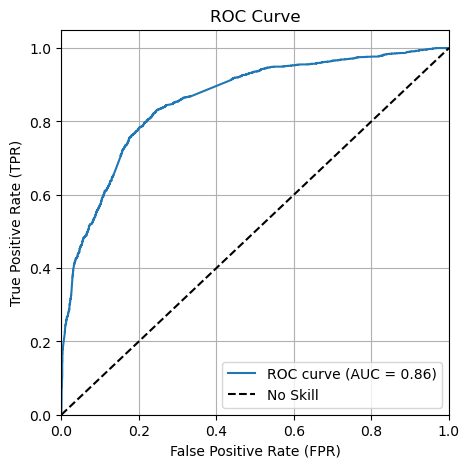

In [96]:
def plot_roc_curve(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Example usage (assuming you have your y_true and y_score data)
plot_roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Conversion_Probability"])

## Step 8: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity, specificity and accuracy.

In [97]:
# Let's create columns with different probability cutoffs-
cutoffs = [float(x)/10 for x in range(10)]

for i in cutoffs:
    y_train_pred_final[i] = y_train_pred_final["Conversion_Probability"].map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Conversion_Probability,may_convert,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.262507,0,1,1,1,0,0,0,0,0,0,0
1,0,0.127125,0,1,1,0,0,0,0,0,0,0,0
2,1,0.113254,0,1,1,0,0,0,0,0,0,0,0
3,1,0.289086,0,1,1,1,0,0,0,0,0,0,0
4,1,0.949807,1,1,1,1,1,1,1,1,1,1,1


In [98]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ["probability", "accuracy", "sensitivity", "specificity"])
from sklearn.metrics import confusion_matrix

# TN = cm[0,0]  true negative
# FP = cm[0,1]  false positive
# FN = cm[1,0]  flase negative
# TP = cm[1,1]  true positive

for i in cutoffs:
    cm = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i])
    total = sum(sum(cm))
    accuracy = (cm[1,1]+cm[0,0])/ total
    sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
    
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.481731,1.000000,0.000000
0.1,0.1,0.524322,0.991159,0.090398
0.2,0.2,0.693118,0.948813,0.455450
0.3,0.3,0.767093,0.866450,0.674740
0.4,0.4,0.789957,0.801768,0.778979
0.5,0.5,0.785698,0.736622,0.831315
0.6,0.6,0.755884,0.622615,0.879758
0.7,0.7,0.733020,0.539321,0.913062
0.8,0.8,0.711051,0.450442,0.953287
0.9,0.9,0.643578,0.279665,0.981834


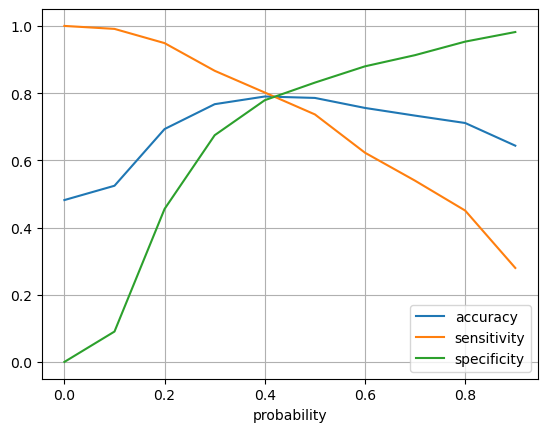

In [99]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.grid(True)
plt.show()

**From the above plot, 0.42 seems the optimum point to take it as a cutoff probability.**

In [100]:
# creating a final_prediction column with 1 if Churn_Prob > 0.42 else 0
y_train_pred_final["final_prediction"] = y_train_pred_final["Conversion_Probability"].map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final["Lead Score"] = y_train_pred_final["Conversion_Probability"].apply(lambda x: int(x*100))
y_train_pred_final["Hot/Cold"] = y_train_pred_final["Lead Score"].apply(lambda x: "Hot" if x>=42 else "Cold")
y_train_pred_final.head()

,Converted,Conversion_Probability,may_convert,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction,Lead Score,Hot/Cold
0,0,0.262507,0,1,1,1,0,0,0,0,0,0,0,0,26,Cold
1,0,0.127125,0,1,1,0,0,0,0,0,0,0,0,0,12,Cold
2,1,0.113254,0,1,1,0,0,0,0,0,0,0,0,0,11,Cold
3,1,0.289086,0,1,1,1,0,0,0,0,0,0,0,0,28,Cold
4,1,0.949807,1,1,1,1,1,1,1,1,1,1,1,1,94,Hot


In [101]:
# Let's check the overall accuracy.
train_accuracy = metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_prediction"])
train_accuracy

0.7890607487110514

In [102]:
# checking confusion matrix again
cm = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["final_prediction"])
cm

array([[1829,  483],
       [ 458, 1691]], dtype=int64)

In [103]:
# new matrix
TN = cm[0,0]  # true negative
FP = cm[0,1]  # false positive
FN = cm[1,0]  # flase negative
TP = cm[1,1]  # true positive

In [104]:
# Let's see the sensitivity of our logistic regression model
train_sensitivity = TP/float(TP+FN)
sensitivity

0.2796649604467194

In [105]:
# Let's see the specificity of our logistic regression model
train_specificity = TN/float(TN+FP)
specificity

0.9818339100346021

In [106]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/float(FP+TN))

0.20891003460207613


In [107]:
# Calculate postive predicted rate -
print(TP/float(TP+FP))

0.7778288868445262


In [108]:
# Calculate negative predicted rate -
print(TN/float(TN+FN))

0.7997376475732401


## Precision and Recall

In [109]:
# importing precision, recall score-
from sklearn.metrics import precision_score, recall_score

##### Precision
TP / TP + FP

In [110]:
precision_score(y_train_pred_final["Converted"], y_train_pred_final["final_prediction"])

0.7778288868445262

##### Recall
TP / TP + FN

In [111]:
recall_score(y_train_pred_final["Converted"], y_train_pred_final["final_prediction"])

0.78687761749651

### Precision and recall tradeoff

In [112]:
# importing precision_recall_curve from sklearn
from sklearn.metrics import precision_recall_curve

In [113]:
p, r, threshold = precision_recall_curve(y_train_pred_final["Converted"], y_train_pred_final["Conversion_Probability"])

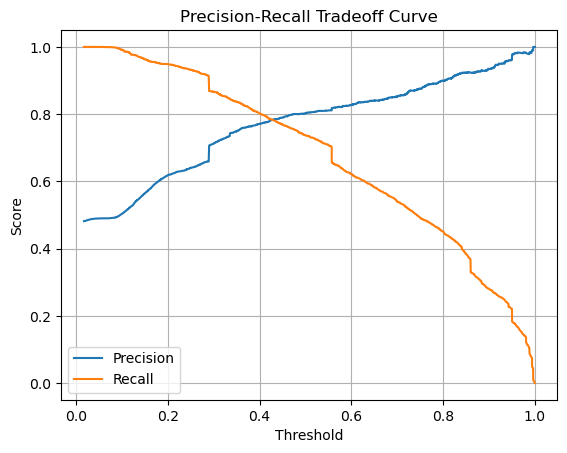

In [114]:
plt.plot(threshold, p[:-1], label="Precision")
plt.plot(threshold, r[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Tradeoff Curve")
plt.legend()
plt.grid(True)
plt.show()

In the above plot also, best cutoff is still about 0.42

## Step 9: Making predictions on the test set

In [115]:
# checking X_test
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4771,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
6122,7.0,66,7.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9202,4.0,947,4.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6570,3.0,861,3.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2668,8.0,898,4.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [116]:
# these are the final selected columns-
selected = X_train.columns
selected

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [117]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4771,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
6122,7.0,66,7.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9202,4.0,947,4.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6570,3.0,861,3.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2668,8.0,898,4.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [118]:
# Rescaling X_test
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])
X_test = X_test[selected]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0
6122,0.027888,0.029049,1,0,0,0,0,0,0,0,1,0
9202,0.015936,0.416813,1,0,0,0,0,0,1,0,1,0
6570,0.011952,0.378961,1,0,0,0,0,0,1,0,1,0
2668,0.031873,0.395246,1,0,0,0,0,0,1,0,1,0


In [119]:
# adding constant
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set.

In [120]:
# Getting the predicted values on the test set and reshaping y_train_pred into 2d array
y_test_pred = params.predict(X_test_sm).values.reshape(-1)
y_test_pred

array([0.99594837, 0.11504727, 0.66674451, ..., 0.7770383 , 0.72469769,
       0.52793856])

**Creating a dataframe with the actual Conversion flag and the Conversion_Probability and final_predictions as well**

In [121]:
# creating final usable y_test_pred_final dataframe
y_test_pred_final =  pd.DataFrame({"Converted":y_test.values, "Conversion_Probability":y_test_pred})
y_test_pred_final.head()

,Converted,Conversion_Probability
0,1,0.995948
1,0,0.115047
2,0,0.666745
3,1,0.618574
4,1,0.681888


**Creating new column "final_prediction" with 1 if Conversion_Prob > 0.42 else 0**

In [122]:
y_test_pred_final["final_prediction"] = y_test_pred_final["Conversion_Probability"].apply(lambda x: 1 if x > 0.42 else 0)
y_test_pred_final["Lead Score"] = y_test_pred_final["Conversion_Probability"].apply(lambda x: int(x*100))
y_test_pred_final["Hot/Cold"] = y_test_pred_final["Lead Score"].apply(lambda x: "Hot" if x>=42 else "Cold")
y_test_pred_final.head()

,Converted,Conversion_Probability,final_prediction,Lead Score,Hot/Cold
0,1,0.995948,1,99,Hot
1,0,0.115047,0,11,Cold
2,0,0.666745,1,66,Hot
3,1,0.618574,1,61,Hot
4,1,0.681888,1,68,Hot


In [123]:
# Let's check the overall accuracy.
test_accuracy = metrics.accuracy_score(y_test_pred_final["Converted"], y_test_pred_final["final_prediction"])
test_accuracy

0.7902719665271967

In [124]:
# checking confusion matrix
cm_test = metrics.confusion_matrix(y_test_pred_final["Converted"], y_test_pred_final["final_prediction"])
cm_test

array([[794, 202],
       [199, 717]], dtype=int64)

In [125]:
# test matrix
TN = cm_test[0,0]  # true negative
FP = cm_test[0,1]  # false positive
FN = cm_test[1,0]  # flase negative
TP = cm_test[1,1]  # true positive

In [126]:
# Let's see the sensitivity of our logistic regression model(Test data)
test_sensitivity = TP / float(TP+FN)
test_sensitivity

0.7827510917030568

In [127]:
# Let us calculate specificity
test_specificity = TN / float(TN+FP)
test_specificity

0.7971887550200804

In [128]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/float(FP+TN))

0.20281124497991967


In [129]:
# Calculate postive predicted rate -
print(TP/float(TP+FP))

0.780195865070729


In [130]:
# Calculate negative predicted rate -
print(TN/float(TN+FN))

0.7995971802618328


## Let's compare train-test's accuracy, sensitivity and specificity side by side to know how reliable our model is-

In [131]:
print("              Training set       |       Test set")
print("-"*55)
print("Accuracy", "   |", train_accuracy,"|",test_accuracy)
print("Sensitivity", "|", train_sensitivity,"  |",test_sensitivity)
print("specificity", "|", train_specificity,"|",test_specificity)

              Training set       |       Test set
-------------------------------------------------------
Accuracy    | 0.7890607487110514 | 0.7902719665271967
Sensitivity | 0.78687761749651   | 0.7827510917030568
specificity | 0.7910899653979239 | 0.7971887550200804


As in the above output, it is clear that model trained is also working in test set.